In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
assets_path = '/content/drive/MyDrive/CV_Exercise_Assets/Exercise1_Assets/1.2/'

In [4]:
#learnt and implimented the way to add grid on an image using the cv.line function. source: https://gist.github.com/mathandy/389ddbad48810d188bdc997c3a1dab0c
def importAndGrid(imageFile):
  image = cv.imread(assets_path + imageFile, cv.IMREAD_COLOR)
  originalImage = np.copy(image)
  h, w, = image.shape[:2]
  grid_shape=(25,25)
  rows, cols = grid_shape
  dy, dx = h / rows, w / cols

  # drawing vertical lines
  for x in np.linspace(start=dx, stop=w-dx, num=cols-1):
      x = int(round(x))
      cv.line(image, (x, 0), (x, h), color= (255,0,0), thickness=2)

  # drawing horizontal lines
  for y in np.linspace(start=dy, stop=h-dy, num=rows-1):
      y = int(round(y))
      cv.line(image, (0, y), (w, y), color= (255,0,0), thickness=2)

  return image, originalImage

In [5]:
def addPoints(imageFile, mySourcePoints):
  image, originalImage = importAndGrid(imageFile)
  #Code from provided tutorial
  copied = np.copy(image)
  def drawCircle(image, p, color):
    cv.circle(image, p, 15, color = color, thickness = -1)

  new_extent = [0, 50, 50, 0]

  # Calculating the scaling factors because new extent has been placed for convenience. Implementation help from ChatGPT
  x_scale = (new_extent[1] - new_extent[0]) / image.shape[1]
  y_scale = (new_extent[2] - new_extent[3]) / image.shape[0]

  # Draw blue points on the image. Blue points are source points.
  p1 = mySourcePoints[0]
  p2 = mySourcePoints[1]
  p3 = mySourcePoints[2]
  p4 = mySourcePoints[3]

  #converting points selected after using new extent back to original co-ordinates in the image
  original_points_source = [(int(point[0] / x_scale), int(point[1] / y_scale)) for point in [p1,p2,p3,p4]]

  for p in original_points_source:
    drawCircle(copied, p, color=(0, 0, 255))


  return copied, originalImage, original_points_source

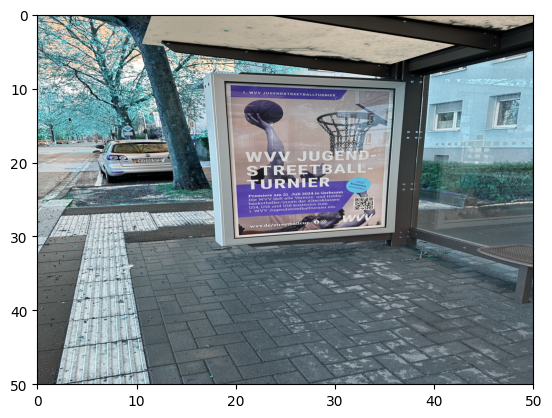

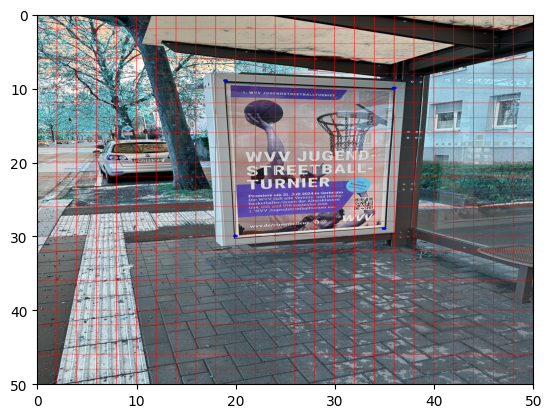

In [6]:
#Image 1
imageFile = "IMG_1828.jpg"

# Initially I set these points to (0,0) to visualise the image first and gradually change values/co-ordinates to my needs
msp1 = (19, 9)
msp2 = (36, 10)
msp3 = (20, 30)
msp4 = (35, 29)

mySourcePoints = [msp1, msp2, msp3, msp4]

pointsImage, originalImage, original_points_source = addPoints(imageFile, mySourcePoints)

plt.imshow(originalImage, aspect = "auto", extent = [0, 50, 50, 0])
plt.figure()
plt.imshow(pointsImage, aspect = "auto", extent = [0, 50, 50, 0])

paste_coordinate = original_points_source

In [7]:
 #Code from provided tutorial but modified to no not involve click read
# Read source image
img_src = cv.imread(assets_path + "IMG_Snail.jpg", cv.IMREAD_COLOR)
img_src = cv.rotate(img_src, cv.ROTATE_90_COUNTERCLOCKWISE)
img_src = cv.flip(img_src, 0)
h, w, c = img_src.shape
# Get source image parameter: [[left,top], [left,bottom], [right, top], [right, bottom]]
img_src_coordinate = np.array([[0,0],[0,h],[w,0],[w,h]])

In [8]:
# Read destination image
img_dest = cv.imread(assets_path + "IMG_1828.jpg", cv.IMREAD_COLOR)

paste_coordinate = np.array(paste_coordinate)

matrix: [[1.04390069e-01 1.02611652e+00 1.14900000e+03]
 [9.21706324e-01 1.38679001e-01 7.25000000e+02]
 [6.38677881e-05 9.11434361e-05 1.00000000e+00]]


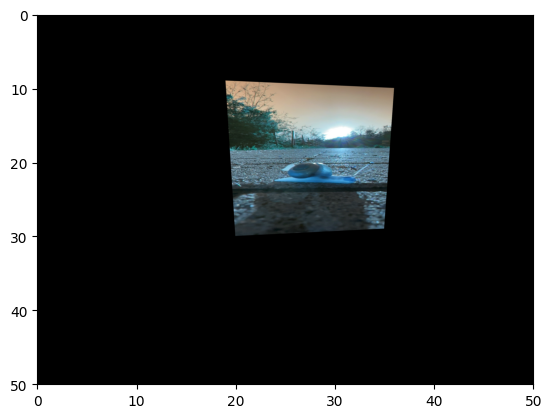

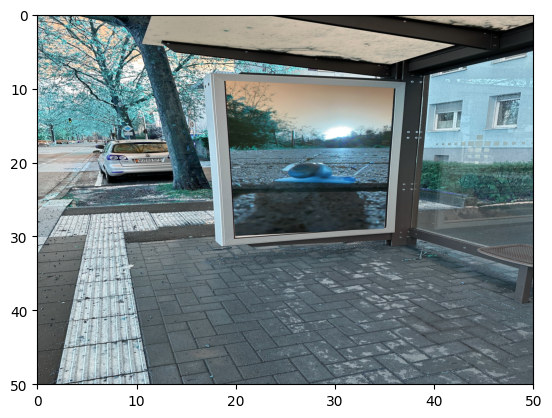

In [9]:
# Get perspective matrix
matrix, _ = cv.findHomography(img_src_coordinate, paste_coordinate, 0)
print(f'matrix: {matrix}')
perspective_img = cv.warpPerspective(img_src, matrix, (img_dest.shape[1], img_dest.shape[0]))
plt.imshow(perspective_img, aspect = "auto", extent = [0, 50, 50, 0])
cv.copyTo(src=perspective_img, mask=np.tile(perspective_img, 1), dst=img_dest)
plt.figure()
plt.imshow(img_dest, aspect = "auto", extent = [0, 50, 50, 0])
cv.waitKey()
cv.destroyAllWindows()